<a href="https://colab.research.google.com/github/astridyusiang-pixel/mini-project-wine/blob/main/Patient_Demographics_and_Hospital_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


df = pd.read_csv("healthcare_dataset.csv")


df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.columns



Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:

df.isnull().sum()


df.fillna(method='ffill', inplace=True)

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


/tmp/ipython-input-412132193.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


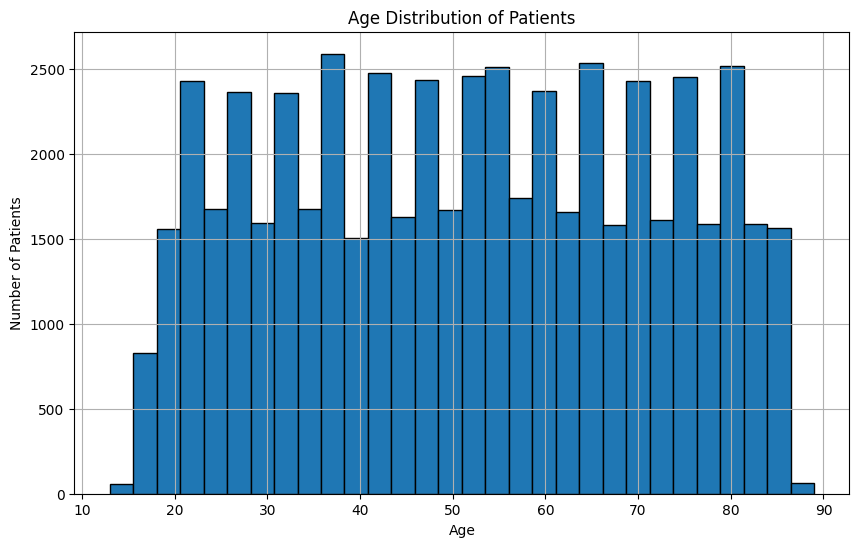

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


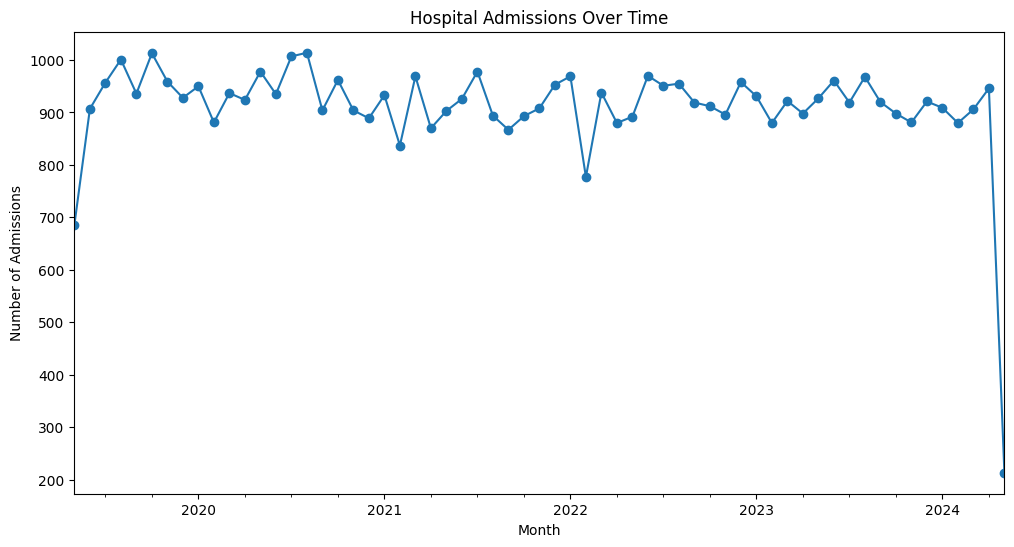

In [8]:

df['Month'] = df['Date of Admission'].dt.to_period('M')
monthly_admissions = df.groupby('Month').size()

monthly_admissions.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Hospital Admissions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.show()


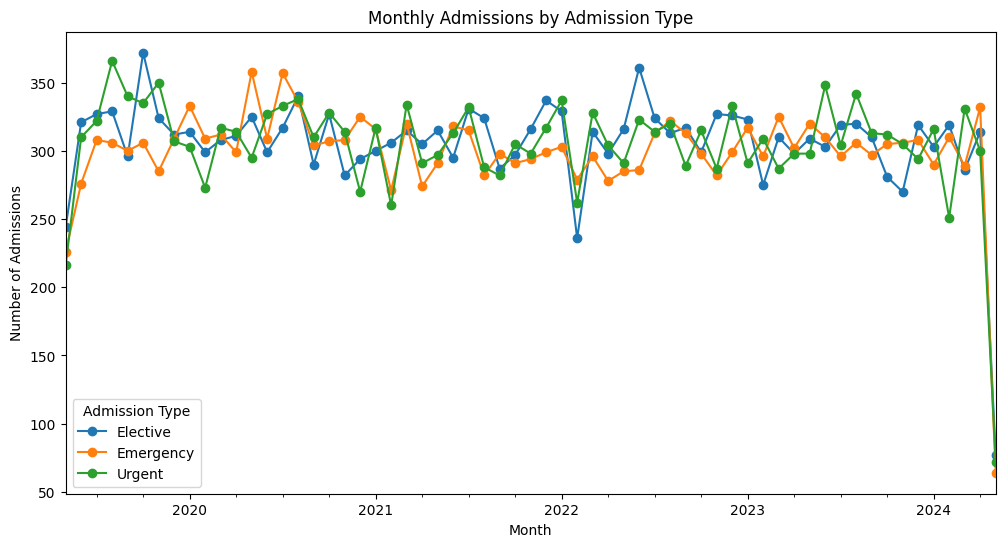

In [9]:

admission_type_monthly = df.groupby(['Admission Type', 'Month']).size().unstack(0)


admission_type_monthly.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Admissions by Admission Type')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title='Admission Type')
plt.show()
